In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from termcolor import colored
import pandas as pd
import numpy as np
import uproot
from tqdm.auto import tqdm
tqdm.pandas()
import sys
sys.path.append('/home/belle/zhangboy/inclusive_R_D/')
import utilities as util
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)

training_variables = util.training_variables
columns = util.all_relevant_variables #+ ['ell_GMdaughter_0_PDG','ell_GMdaughter_1_PDG',
                                       #  'ell_Mdaughter_0_PDG','ell_Mdaughter_1_PDG']

## Electron channel

In [2]:
local_mc = uproot.concatenate([f'../../Samples/Generic_MC15ri/e_channel/MC15ri_local_200fb/*.root:B0'],
                          library="np")
df_mc_local = pd.DataFrame(local_mc)

df_mc_local.eval('B_D_ReChi2 = B0_vtxReChi2 + D_vtxReChi2', inplace=True)
df_mc_local.eval(f'p_D_l = D_CMS_p + ell_CMS_p', inplace=True)

In [5]:
df_test.columns.tolist()

['__experiment__',
 '__run__',
 '__event__',
 '__production__',
 '__candidate__',
 '__ncandidates__',
 '__weight__',
 'Ecms',
 'ROEeidBDT',
 'ROEmuidBDT',
 'B0_Mbc',
 'B0_deltaE',
 'B0_roeMbc_my_mask',
 'B0_roeM_my_mask',
 'B0_roeDeltae_my_mask',
 'B0_roeCharge_my_mask',
 'B0_roeNeextra_my_mask',
 'B0_roeEextra_my_mask',
 'B0_nROE_Charged_my_mask',
 'B0_nROE_ECLClusters_my_mask',
 'B0_nROE_NeutralECLClusters_my_mask',
 'B0_nROE_KLMClusters',
 'B0_nROE_NeutralHadrons_my_mask',
 'B0_nROE_Photons_my_mask',
 'B0_nROE_Tracks_my_mask',
 'B0_nROE_Composites_my_mask',
 'B0_nROE_e',
 'B0_nROE_mu',
 'B0_nROE_K',
 'B0_nROE_pi',
 'B0_isContinuumEvent',
 'B0_R2',
 'B0_thrustBm',
 'B0_thrustOm',
 'B0_cosTBTO',
 'B0_cosTBz',
 'B0_KSFWV1',
 'B0_KSFWV2',
 'B0_KSFWV3',
 'B0_KSFWV4',
 'B0_KSFWV5',
 'B0_KSFWV6',
 'B0_KSFWV7',
 'B0_KSFWV8',
 'B0_KSFWV9',
 'B0_KSFWV10',
 'B0_KSFWV11',
 'B0_KSFWV12',
 'B0_KSFWV13',
 'B0_KSFWV14',
 'B0_KSFWV15',
 'B0_KSFWV16',
 'B0_KSFWV17',
 'B0_KSFWV18',
 'B0_CC1',
 'B0_CC2

In [3]:
BDT_continuum='signal_prob<0.3 and continuum_prob>0.8 and fakeD_prob<0.05'
BDT_sig='signal_prob==largest_prob and signal_prob>0.8 and continuum_prob<0.04 and fakeD_prob<0.05'
BDT_no_sig = 'signal_prob<0.3'
BDT_all = 'signal_prob>=0'

In [4]:
# load MVA
import lightgbm as lgb
# df_mc_4S_offres_BDT_conti = util.apply_mva_bcs(df_mc_4S_offres, training_variables, BDT_continuum)
# df_data_4S_offres_BDT_conti = util.apply_mva_bcs(df_data_4S_offres, training_variables, BDT_continuum)

df_mc_local_BDT_sig = util.apply_mva_bcs(df_mc_local, training_variables, BDT_sig)
# df_data_4S_offres_BDT_sig = util.apply_mva_bcs(df_data_4S_offres, training_variables, BDT_sig)

df_mc_local_BDT_all = util.apply_mva_bcs(df_mc_local, training_variables, BDT_all)
# df_data_local_BDT_all = util.apply_mva_bcs(df_data_local, training_variables, BDT_all)

In [6]:
# columns_without_nan = df_data_4S_offres_BDT_conti.columns[~df_data_4S_offres_BDT_conti.isna().any()].tolist()

samples=util.get_dataframe_samples_new(df_mc_local_BDT_sig, 'e', template=False)
mpl=util.mpl(samples,None)
# df_conti_conti = samples['bkg_continuum']
for name, df in samples.items():
    print(name, len(df))

bkg_FakeD 78329
bkg_TDFl 2629
bkg_fakeTracks 1814
bkg_continuum 3110
bkg_combinatorial 8185
bkg_singleBbkg 4584
bkg_other_TDTl 0
$D\tau\nu$ 1574
$D^\ast\tau\nu$ 1072
$D\ell\nu$ 22958
$D^\ast\ell\nu$ 18430
$D^{\ast\ast}\tau\nu$ 663
$D^{\ast\ast}\ell\nu$ 11162
$D\ell\nu$_gap 2830
bkg_other_signal 0


In [7]:
# columns_without_nan = df_data_4S_offres_BDT_conti.columns[~df_data_4S_offres_BDT_conti.isna().any()].tolist()

samples=util.get_dataframe_samples_new(df_mc_local_BDT_all, 'e', template=False)
mpl=util.mpl(samples,None)
# df_conti_conti = samples['bkg_continuum']
for name, df in samples.items():
    print(name, len(df))

bkg_FakeD 2084032
bkg_TDFl 25222
bkg_fakeTracks 58362
bkg_continuum 67183
bkg_combinatorial 84932
bkg_singleBbkg 34319
bkg_other_TDTl 0
$D\tau\nu$ 2575
$D^\ast\tau\nu$ 1765
$D\ell\nu$ 59443
$D^\ast\ell\nu$ 46903
$D^{\ast\ast}\tau\nu$ 1804
$D^{\ast\ast}\ell\nu$ 34984
$D\ell\nu$_gap 13081
bkg_other_signal 0


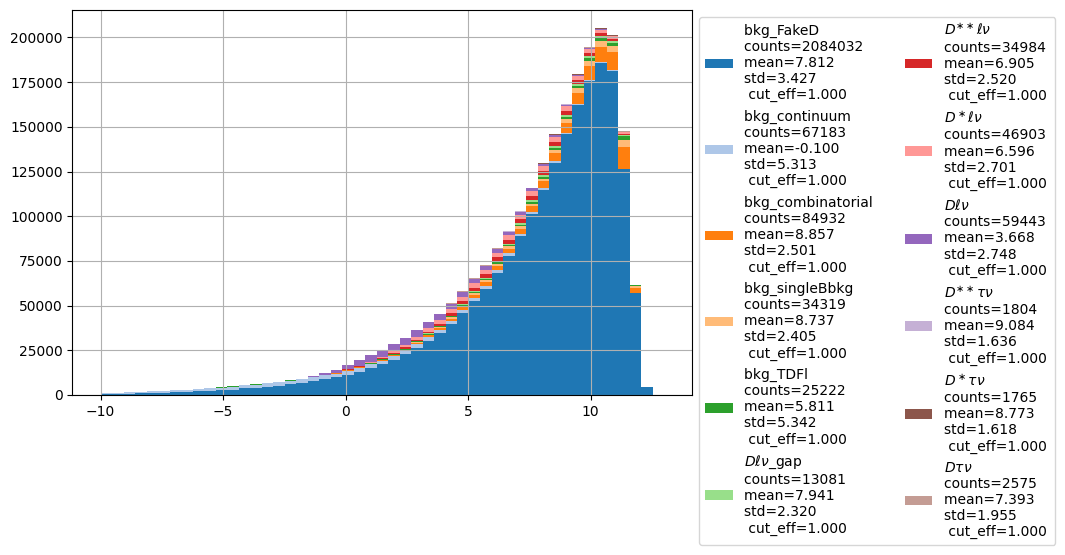

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
b1 = np.linspace(-10,13,50)
hist = mpl.plot_mc_1d(variable='B0_CMS3_weQ2lnuSimple',bins=b1,cut=None,mask=[],ax=ax)
ax.legend(bbox_to_anchor=(1,1),ncol=2)
ax.grid()

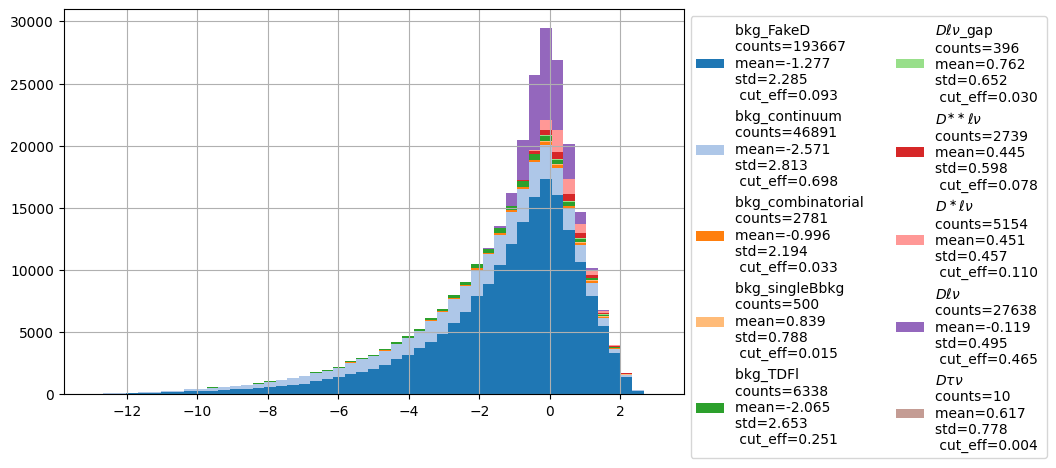

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
b1 = np.linspace(-13,3,50)
hist = mpl.plot_mc_1d(variable='B0_CMS3_weMissM2',bins=b1,cut='B0_CMS3_weQ2lnuSimple<3',mask=[],ax=ax)
ax.legend(bbox_to_anchor=(1,1),ncol=2)
ax.grid()

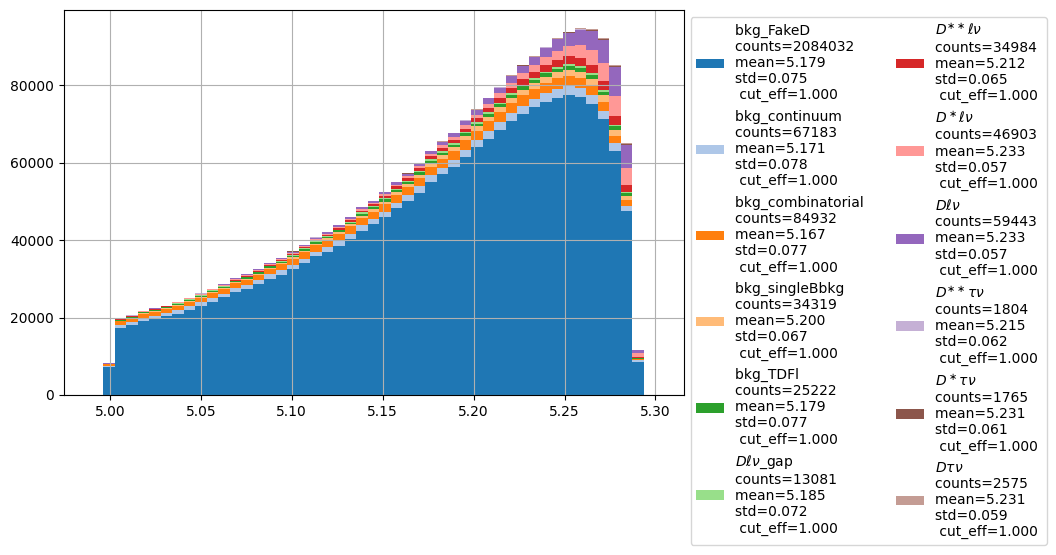

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
b1 = np.linspace(4.99,5.3,50)
hist = mpl.plot_mc_1d(variable='B0_roeMbc_my_mask',bins=b1,cut=None,mask=[],ax=ax)
ax.legend(bbox_to_anchor=(1,1),ncol=2)
ax.grid()

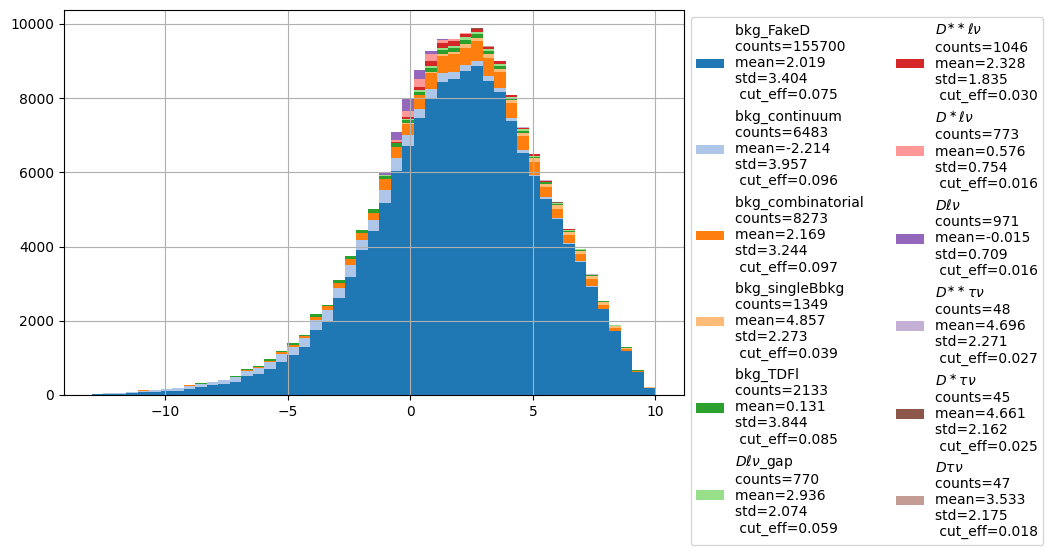

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
b1 = np.linspace(-13,10,50)
hist = mpl.plot_mc_1d(variable='B0_CMS3_weMissM2',bins=b1,cut='B0_roeMbc_my_mask<5.05',mask=[],ax=ax)
ax.legend(bbox_to_anchor=(1,1),ncol=2)
ax.grid()

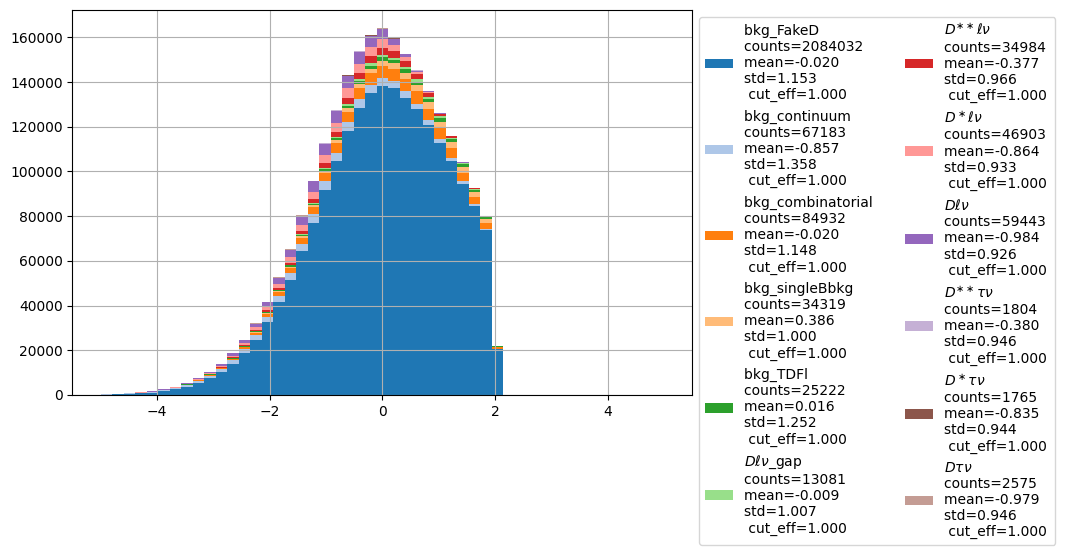

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
b1 = np.linspace(-5,5,50)
hist = mpl.plot_mc_1d(variable='B0_roeDeltae_my_mask',bins=b1,cut=None,mask=[],ax=ax)
ax.legend(bbox_to_anchor=(1,1),ncol=2)
ax.grid()

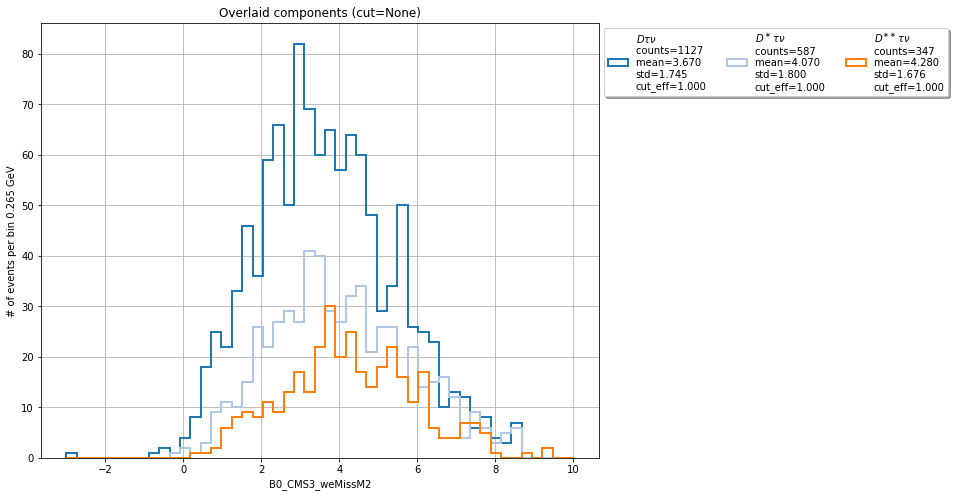

In [31]:
b1 = np.linspace(-3,10,50)
mpl.plot_all_overlaid(variable='B0_CMS3_weMissM2',bins=b1,cut=None,
                      mask=[r'$D\ell\nu$',r'$D^\ast\ell\nu$',r'$D^{\ast\ast}\ell\nu$_res',
                            r'$D^{\ast\ast}\ell\nu$_gap_non','bkg_fakeTracks',
                            'bkg_FDFl', 'bkg_FDTl', 'bkg_TDFl', 'bkg_continuum',
                            'bkg_combinatorial', 'bkg_singleBbkg'],density=False)

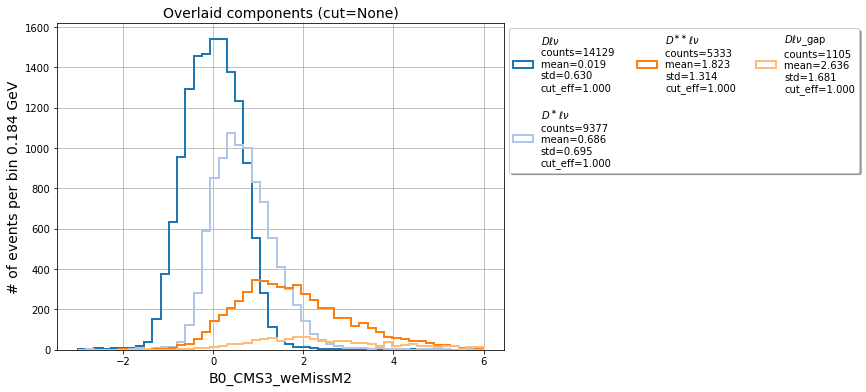

In [30]:
b1 = np.linspace(-3,6,50)
mpl.plot_all_mc_overlaid(variable='B0_CMS3_weMissM2',bins=b1,cut=None,
                      mask=[r'$D\tau\nu$',r'$D^\ast\tau\nu$',r'$D^{\ast\ast}\tau\nu$',
                            'bkg_fakeTracks',
                            'bkg_FakeD','bkg_TDFl', 'bkg_continuum',
                            'bkg_combinatorial', 'bkg_singleBbkg'],density=False)

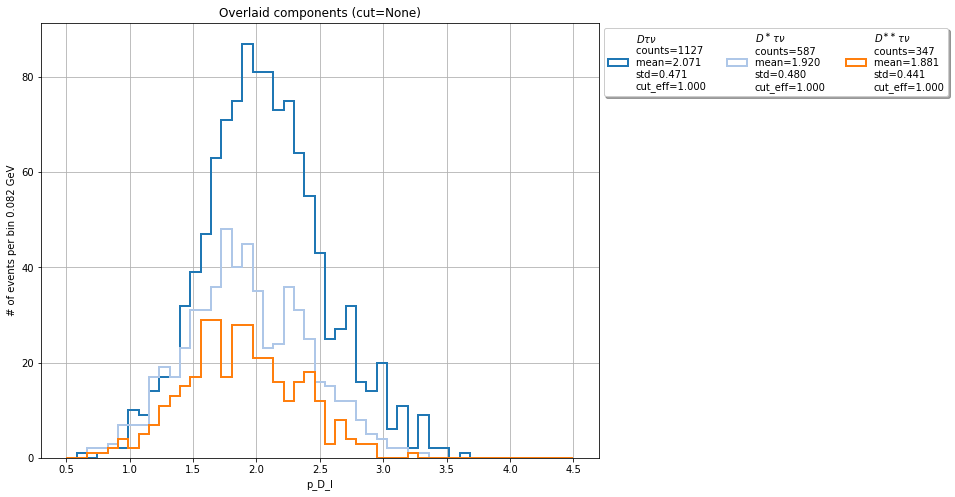

In [35]:
b1 = np.linspace(0.5,4.5,50)
mpl.plot_all_overlaid(variable='p_D_l',bins=b1,cut=None,
                      mask=[r'$D\ell\nu$',r'$D^\ast\ell\nu$',r'$D^{\ast\ast}\ell\nu$_res',
                            r'$D^{\ast\ast}\ell\nu$_gap_non','bkg_fakeTracks',
                            'bkg_FDFl', 'bkg_FDTl', 'bkg_TDFl', 'bkg_continuum',
                            'bkg_combinatorial', 'bkg_singleBbkg'],density=False)

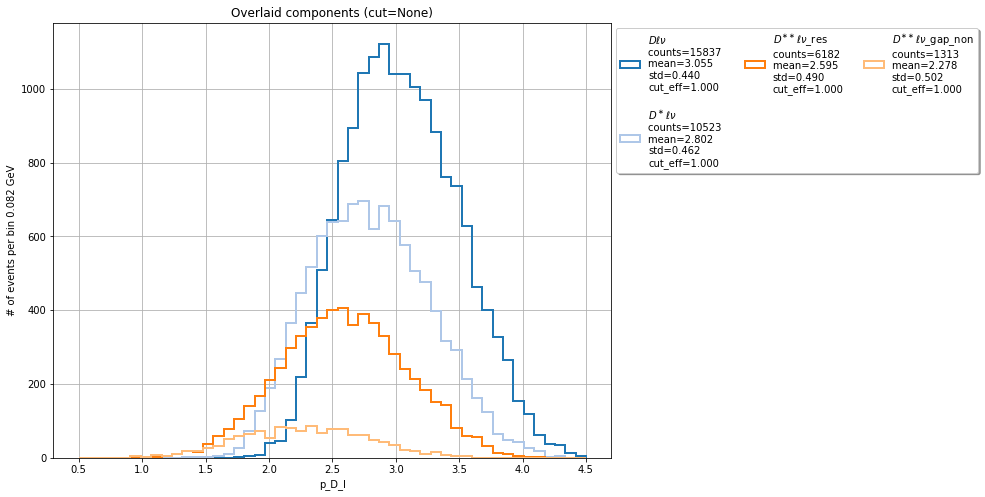

In [36]:
b1 = np.linspace(0.5,4.5,50)
mpl.plot_all_overlaid(variable='p_D_l',bins=b1,cut=None,
                      mask=[r'$D\tau\nu$',r'$D^\ast\tau\nu$',r'$D^{\ast\ast}\tau\nu$',
                            'bkg_fakeTracks',
                            'bkg_FDFl', 'bkg_FDTl', 'bkg_TDFl', 'bkg_continuum',
                            'bkg_combinatorial', 'bkg_singleBbkg'],density=False)

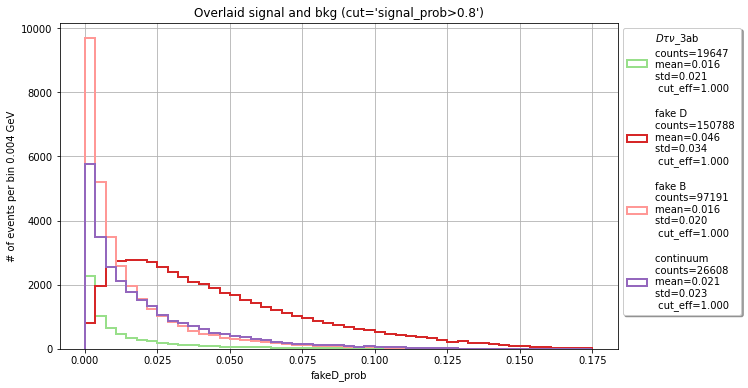

In [9]:
b1 = np.linspace(0,0.175,50)
plot_bkg_overlaid(variable='fakeD_prob',bins=b1,scale=[1/3,1/3,1/3,1],cut='signal_prob>0.8')

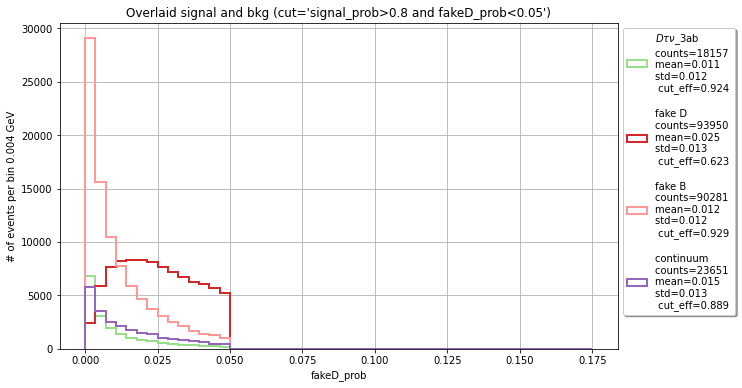

In [45]:
b1 = np.linspace(0,0.175,50)
plot_bkg_overlaid(variable='fakeD_prob',bins=b1,scale=[1,1,1,1],cut='signal_prob>0.8 and fakeD_prob<0.05')

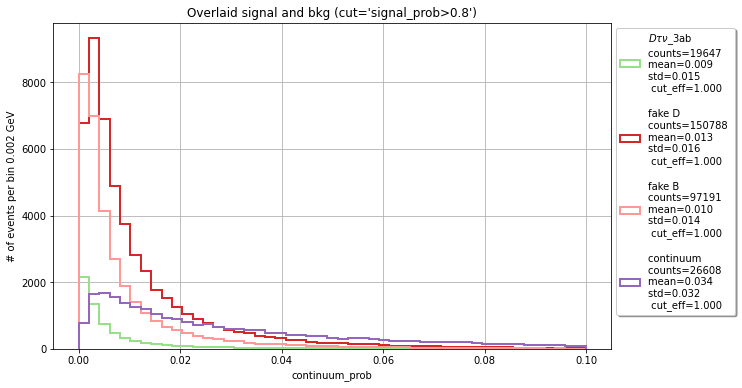

In [12]:
b1 = np.linspace(0,0.1,50)
plot_bkg_overlaid(variable='continuum_prob',bins=b1,scale=[1/3,1/3,1/3,1],cut='signal_prob>0.8')

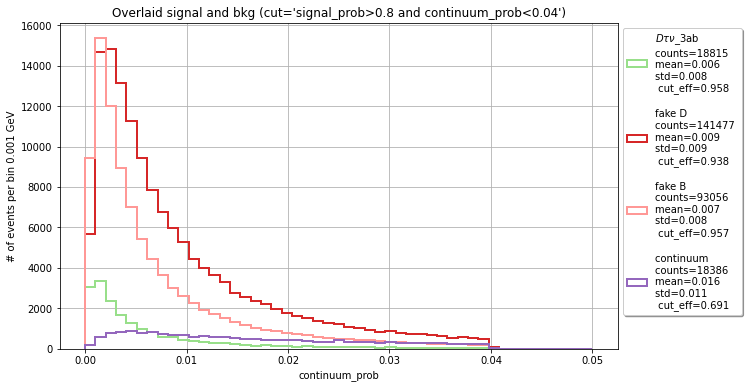

In [31]:
b1 = np.linspace(0,0.05,50)
plot_bkg_overlaid(variable='continuum_prob',bins=b1,scale=[1,1,1,1],cut='signal_prob>0.8 and continuum_prob<0.04')

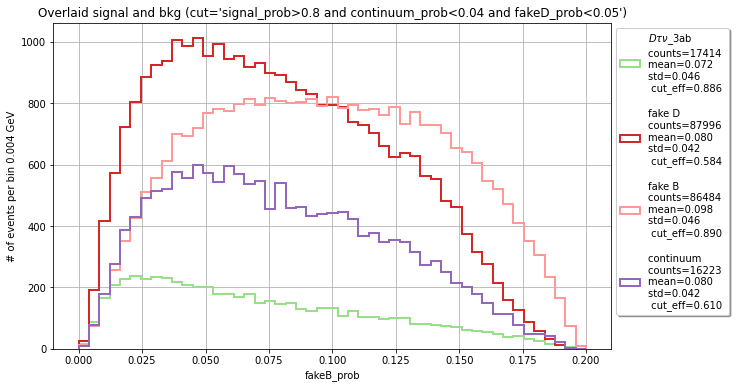

In [16]:
b1 = np.linspace(0,0.2,50)
plot_bkg_overlaid(variable='fakeB_prob',bins=b1,scale=[1/3,1/3,1/3,1],cut='signal_prob>0.8 and continuum_prob<0.04 and fakeD_prob<0.05')

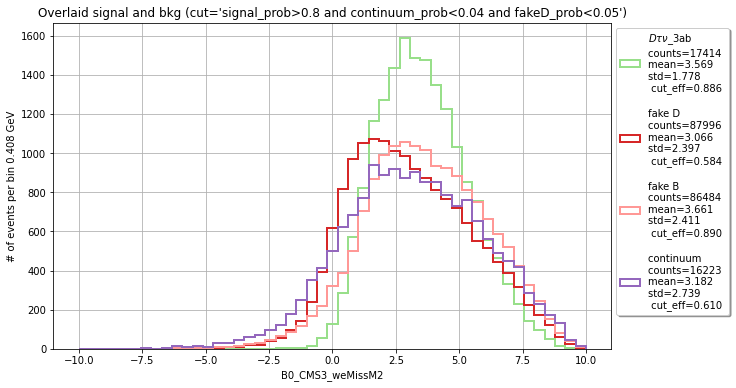

In [30]:
b1 = np.linspace(-10,10,50)
plot_bkg_overlaid(variable='B0_CMS3_weMissM2',bins=b1,scale=[1,16/87,16/86,1],cut='signal_prob>0.8 and continuum_prob<0.04 and fakeD_prob<0.05')

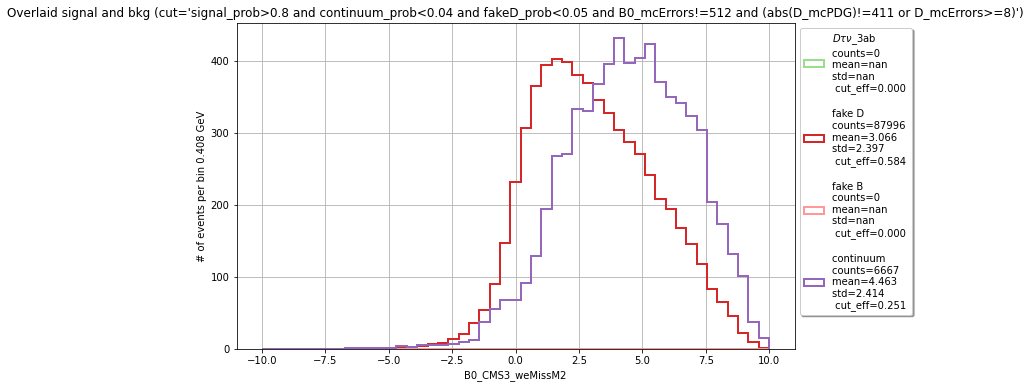

In [25]:
b1 = np.linspace(-10,10,50)
plot_bkg_overlaid(variable='B0_CMS3_weMissM2',bins=b1,scale=[1,6/87,1,1],cut='signal_prob>0.8 and continuum_prob<0.04 and fakeD_prob<0.05 and B0_mcErrors!=512 and (abs(D_mcPDG)!=411 or D_mcErrors>=8)')

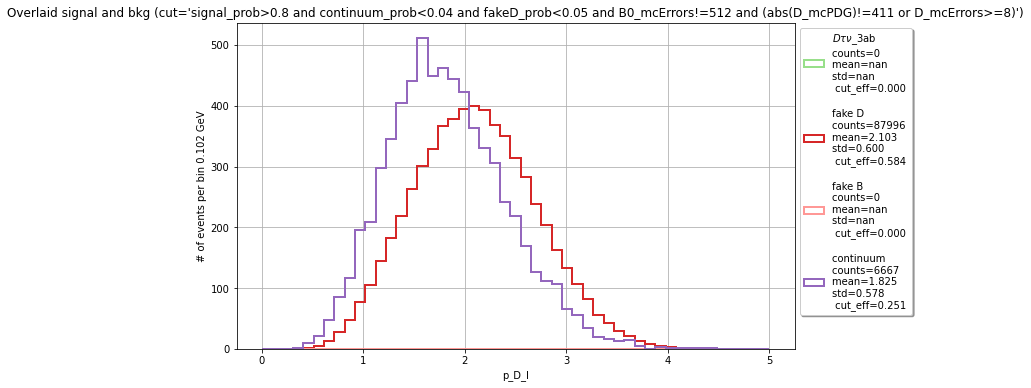

In [36]:
b1 = np.linspace(0,5,50)
plot_bkg_overlaid(variable='p_D_l',bins=b1,scale=[1,6/87,1,1],cut='signal_prob>0.8 and continuum_prob<0.04 and fakeD_prob<0.05 and B0_mcErrors!=512 and (abs(D_mcPDG)!=411 or D_mcErrors>=8)')

## Muon channel

In [3]:
local_mc = uproot.concatenate([f'../../Samples/Generic_MC15ri/mu_channel/MC15ri_local_200fb/*.root:B0'],
                          library="np")
df_test = pd.DataFrame(local_mc)

df_test.eval('B_D_ReChi2 = B0_vtxReChi2 + D_vtxReChi2', inplace=True)
df_test.eval(f'p_D_l = D_CMS_p + ell_CMS_p', inplace=True)

In [5]:
# Check for duplicate entries
util.check_duplicate_entries(samples)

No duplicate pairs found.
